<a href="https://colab.research.google.com/github/shakiratsal/NMLB/blob/main/Northern_Maize_Leaf_Blight_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install polars

In [5]:
import numpy as np
import polars as pl  # Use Polars instead of Pandas
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
!pip install opencv-python
!pip install polars
!pip install tqdm

# Define paths
data_dir = '/content/drive/MyDrive/NMLB_detection/data/images/images_handheld'  # Path to your images
annotation_file = '/content/drive/MyDrive/NMLB_detection/data/annotations/new_annotations_handheld.csv'  # Path to the annotation CSV file
image_size = (224, 224)  # Resize images to this size

#Import the polars library
import polars as pl

# Load annotations from CSV using Polars
annotations = pl.read_csv(annotation_file)

# Function to create masks from bounding box coordinates
def create_mask(image_name, x1, y1, x2, y2):
    import numpy as np #Import numpy within the function
    mask = np.zeros((image_size[0], image_size[1]), dtype=np.uint8)
    mask[y1:y2, x1:x2] = 1  # Set the bounding box area to 1
    return mask

# Load images and masks
images = []
masks = []
import os # Import the os module
from tqdm import tqdm # Import the tqdm module
import cv2 #Import the cv2 module

# Iterate through the Polars DataFrame with tqdm
for row in tqdm(annotations.iter_rows(named=True), total=annotations.shape[0]): # Wrap the iterator with tqdm and specify total iterations
    img_path = os.path.join(data_dir, row['image'])  # Access the

100%|██████████| 7699/7699 [00:00<00:00, 226433.77it/s]


In [7]:
# Create a U-Net model instance
model = unet_with_attention()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
import numpy as np
import polars as pl
import cv2
from sklearn.model_selection import train_test_split

# Load and preprocess your dataset
# (Assuming you have already loaded images and masks into lists)

# Convert to numpy arrays
X = np.array(images, dtype=np.float32) / 255.0  # Normalize images
y = np.array(masks, dtype=np.float32)  # Masks should be in float32

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
epochs = 50  # You can adjust the number of epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=16)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 1.0000 - loss: 7.3268e-05 - val_accuracy: 1.0000 - val_loss: 9.7832e-06
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 1.0000 - loss: 1.0773e-05 - val_accuracy: 1.0000 - val_loss: 2.5251e-06
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 1.0000 - loss: 4.4387e-06 - val_accuracy: 1.0000 - val_loss: 1.0448e-06
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 1.0000 - loss: 1.6073e-06 - val_accuracy: 1.0000 - val_loss: 6.0277e-07
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 1.0000 - loss: 8.5621e-07 - val_accuracy: 1.0000 - val_loss: 4.2979e-07
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 1.0000 - loss: 5.7411e-07 - val_accuracy: 1.0000 - val_loss: 3.4872e-07
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 1.0000 - loss: 5.9597e-07 - val_accuracy: 1.0000 - val_loss: 3.0584e-07
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 

In [13]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 2.1987e-07
Validation Loss: 0.0000
Validation Accuracy: 1.0000


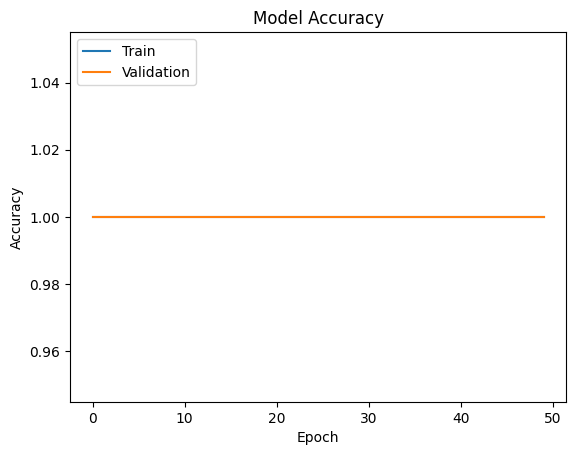

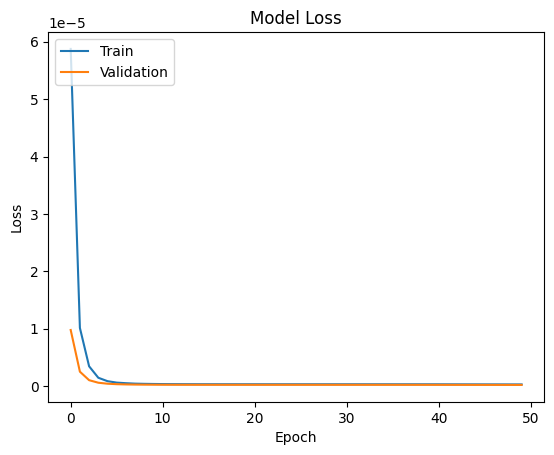

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def predict_and_visualize(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_array = np.expand_dims(img_resized, axis=0) / 255.0  # Normalize

    prediction = model.predict(img_array)
    prediction_mask = (prediction[0] > 0.5).astype(np.uint8) * 255  # Binarize the output

    # Display original image and prediction
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(prediction_mask, cmap='gray')
    plt.title('Predicted NLB Mask')
    plt.axis('off')

    plt.show()

# Example usage
new_image_path = '/content/drive/MyDrive/NMLB_detection/data/images/train/DSC00029.JPG'  # Update this path
predict_and_visualize(new_image_path)